# STEP #0: LIBRARIES IMPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP#1: IMPORT DATASET

In [2]:
Tshirt = pd.read_csv('Tshirt_Sizing_Dataset.csv')

In [3]:
Tshirt.head(100)

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S
5,163,60,S
6,163,61,S
7,160,64,L
8,163,64,L
9,165,61,L


# STEP#2: CREATE TEASTING AND TRAINING DATASET

In [7]:
X = Tshirt.iloc[:, 0:2].values
X

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60],
       [163,  60],
       [163,  61],
       [160,  64],
       [163,  64],
       [165,  61],
       [165,  62],
       [165,  65],
       [168,  62],
       [168,  63],
       [168,  66],
       [170,  63],
       [170,  64],
       [170,  68]])

In [9]:
y = Tshirt.iloc[:, 2].values
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [12]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# STEP#3: MODEL TRAINING

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

# STEP#4: MODEL TESTING

In [20]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 0])

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
cm = confusion_matrix(y_test, y_pred)

In [24]:
?sns.heatmap

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

<Axes: >

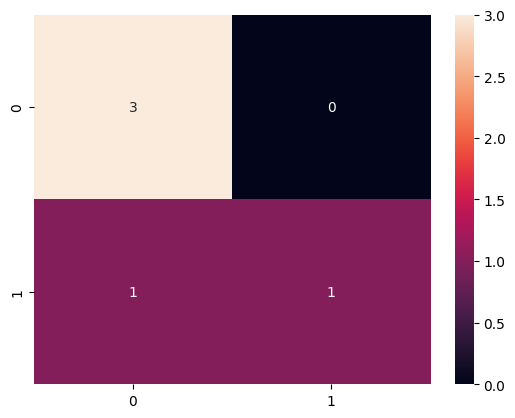

In [32]:
sns.heatmap(data=cm, annot=True, fmt="d")

# STEP#5: TESTING RESULTS VISUALIZATION

# VISUALIZE TRAINING SET RESULTS

In [33]:
from matplotlib.colors import ListedColormap

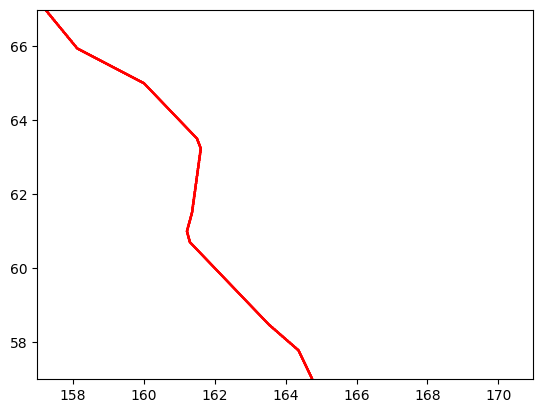

In [35]:
X_grid, y_grid = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step=0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))

plt.contour(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap('red', 'green'))

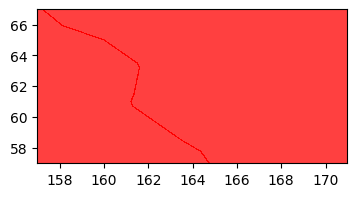

In [43]:
plt.figure(figsize=[4,2])
X_grid, y_grid = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start=X_grid[:, 0].min()-1, stop=X_grid[:,0].max()+1, step=0.01),
                     np.arange(start=X_grid[:,1].min()-1, stop=X_grid[:,1].max()+1,step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap('red', 'green'))


/tmp/ipykernel_357949/4171530100.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid==j,0], X_grid[y_grid==j, 1],


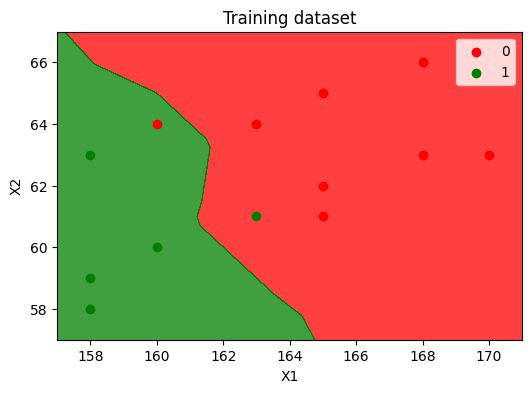

In [50]:
plt.figure(figsize=[6,4])
X_grid, y_grid = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start=X_grid[:,0].min()-1, stop=X_grid[:,0].max()+1, step=0.01),
                     np.arange(start=X_grid[:,1].min()-1, stop=X_grid[:,1].max()+1, step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid==j,0], X_grid[y_grid==j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
    
plt.title('Training dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# VISUALIZE TEST SET RESULTS

In [51]:
from matplotlib.colors import ListedColormap

/tmp/ipykernel_357949/156989191.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid==j,0], X_grid[y_grid==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


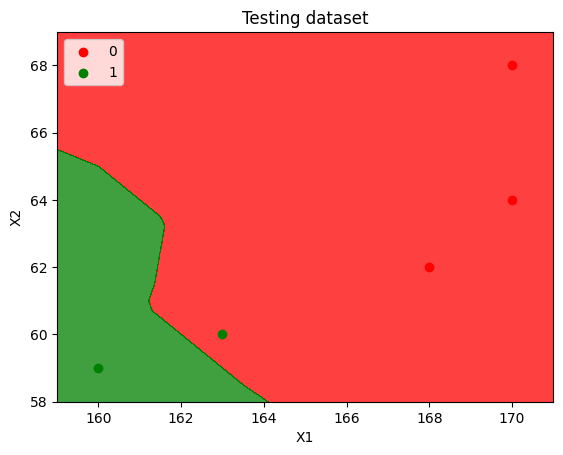

In [52]:
X_grid, y_grid = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start=X_grid[:,0].min()-1, stop=X_grid[:,0].max()+1, step=0.01),
                     np.arange(start=X_grid[:,1].min()-1, stop=X_grid[:,1].max()+1, step=0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid==j,0], X_grid[y_grid==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

plt.title("Testing dataset")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()